In [1]:
import pandas as pd

In [4]:
%matplotlib inline

# Ths sets the backend of matplotlib to the 'inline' backend

# 1:

In [6]:
# We read the csv files into this workbook

players = pd.read_csv("players.csv") 
salary = pd.read_csv("salaries.csv") 

In [9]:
# let's see what players csv contains, explore the data structure of this csv file

players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      18846 non-null  object 
 1   birthYear     18703 non-null  float64
 2   birthMonth    18531 non-null  float64
 3   birthDay      18382 non-null  float64
 4   birthCountry  18773 non-null  object 
 5   birthState    18220 non-null  object 
 6   birthCity     18647 non-null  object 
 7   deathYear     9336 non-null   float64
 8   deathMonth    9335 non-null   float64
 9   deathDay      9334 non-null   float64
 10  deathCountry  9329 non-null   object 
 11  deathState    9277 non-null   object 
 12  deathCity     9325 non-null   object 
 13  nameFirst     18807 non-null  object 
 14  nameLast      18846 non-null  object 
 15  nameGiven     18807 non-null  object 
 16  weight        17975 non-null  float64
 17  height        18041 non-null  float64
 18  bats          17655 non-nu

In [11]:
# We can do this for salaries as well

salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    25575 non-null  int64 
 1   teamID    25575 non-null  object
 2   lgID      25575 non-null  object
 3   playerID  25575 non-null  object
 4   salary    25575 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [13]:
# Let's observe the data

players.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [14]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [15]:
# OK, now we want to merge these two files together, so we can see players and salaries together
# We merge them using pd.merge function in pandas

joined = pd.merge(left=players, right=salary, how = "left") # What is this how? this means, right goes to left

# Now, let's observe the merge_files data structure

joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39455 entries, 0 to 39454
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      39455 non-null  object 
 1   birthYear     39312 non-null  float64
 2   birthMonth    39140 non-null  float64
 3   birthDay      38991 non-null  float64
 4   birthCountry  39382 non-null  object 
 5   birthState    37738 non-null  object 
 6   birthCity     39228 non-null  object 
 7   deathYear     9669 non-null   float64
 8   deathMonth    9668 non-null   float64
 9   deathDay      9667 non-null   float64
 10  deathCountry  9662 non-null   object 
 11  deathState    9603 non-null   object 
 12  deathCity     9658 non-null   object 
 13  nameFirst     39416 non-null  object 
 14  nameLast      39455 non-null  object 
 15  nameGiven     39416 non-null  object 
 16  weight        38584 non-null  float64
 17  height        38650 non-null  float64
 18  bats          38264 non-nu

In [18]:
# Hmmmm, this doesn't looks right
# Looks like playerID have more than the salary, which is not right
# To do this officially in python:

len(players) - len(joined)

# We can see that its negative, means the rows in joined is more than in players, the original data_files

-20609

In [19]:
# This is because there is some duplications
# let's check if there is duplicates

joined["playerID"].value_counts()

# Yes, there is duplication as shown:

moyerja01    25
vizquom01    24
glavito02    23
griffke02    22
thomeji01    22
             ..
linkjo01      1
johnssi01     1
wilsomi02     1
perrini01     1
kleeol01      1
Name: playerID, Length: 18846, dtype: int64

In [26]:
frequency_table = pd.crosstab(index = joined["playerID"], columns= "counts", ascending = False)
frequency_table

TypeError: crosstab() got an unexpected keyword argument 'ascending'

In [27]:
# If we expand it out and look into specific playerID

joined[joined["playerID"] == "moyerja01"]

# Data_files[Data_files["Data"] == "What we looking for"]
# Is there what we looking for == to the [data column in data_files], in our data_files

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
24836,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1986.0,CHN,NL,60000.0
24837,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1987.0,CHN,NL,70000.0
24838,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1988.0,CHN,NL,142500.0
24839,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1989.0,TEX,AL,205000.0
24840,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1990.0,TEX,AL,340000.0
24841,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1991.0,SLN,NL,200000.0
24842,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1993.0,BAL,AL,200000.0
24843,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1994.0,BAL,AL,725000.0
24844,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1995.0,BAL,AL,1100000.0
24845,moyerja01,1962.0,11.0,18.0,USA,PA,Sellersville,NaN,NaN,NaN,...,L,L,1986-06-16,2012-05-27,moyej001,moyerja01,1996.0,BOS,AL,825000.0


In [32]:
# We can see there is a lot duplication
# Now we need to deduplicate them

# But first, we need to sort the data by newest entry
# As seen from the chart above, this player played in a lot of years, so we just want the latest year entry of his salary

joined = joined.sort_values(by = ["playerID", "yearID"])

# After we sort, we just use .drop_duplicate function to drop PlayerID duplicate and keep = last => latest data

deduplicated = joined.drop_duplicates("playerID", keep = "last")

# Then now, we check the length of the data once again to see if there is still any duplicates
len(players) - len(deduplicated)

# Nice!

0

# 2:

In [33]:
# We can see the description of the data using .describe() function

deduplicated["salary"].describe()

count    4.958000e+03
mean     1.692478e+06
std      3.243005e+06
min      0.000000e+00
25%      3.000000e+05
50%      5.075000e+05
75%      1.300000e+06
max      3.257100e+07
Name: salary, dtype: float64

In [36]:
# Let's find out who makes the most money

max_salary = deduplicated["salary"].max()
# This find the max salary, in numbers.

deduplicated[deduplicated["salary"] == max_salary] # We keep using this function: we need to be familiar with this 
# This is often use to find, or look up 
# To explain: 
# Look into deduplicated_file, in column "Salary" in deduplicated_file find who is == to max_salary(the number)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,1988.0,3.0,19.0,USA,TX,Dallas,NaN,NaN,NaN,...,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,2015.0,LAN,NL,32571000.0


In [38]:
# Let's see how much you need to make to be in the top 10%

top_10_per = deduplicated["salary"].quantile(q=0.9)
top_10_per

4500000.0

In [42]:
# Let's see the top 10% best paid players

best_paid = deduplicated[deduplicated["salary"] >= top_10_per]
best_paid

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
91,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,L,R,1996-09-01,2014-09-28,abreb001,abreubo01,2012.0,LAA,AL,9000000.0
94,abreujo02,1987.0,1.0,29.0,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,...,R,R,2014-03-31,2015-10-03,abrej003,abreujo02,2015.0,CHA,AL,8666000.0
181,adamsmi03,1978.0,7.0,29.0,USA,TX,Corpus Christi,NaN,NaN,NaN,...,R,R,2004-05-18,2014-09-18,adamm001,adamsmi03,2014.0,PHI,NL,7000000.0
237,affelje01,1979.0,6.0,6.0,USA,AZ,Phoenix,NaN,NaN,NaN,...,L,L,2002-04-06,2015-10-04,affej001,affelje01,2015.0,SFN,NL,6000000.0
395,alfoned01,1973.0,11.0,8.0,Venezuela,Miranda,Santa Teresa del Tuy,NaN,NaN,NaN,...,R,R,1995-04-26,2006-06-11,alfoe001,alfoned01,2006.0,LAA,AL,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39364,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,R,R,2008-05-31,2015-10-04,ziegb001,zieglbr01,2015.0,ARI,NL,5000000.0
39387,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,R,R,2009-04-20,2015-09-30,zimmj003,zimmejo02,2015.0,WAS,NL,16500000.0
39397,zimmery01,1984.0,9.0,28.0,USA,NC,Washington,NaN,NaN,NaN,...,R,R,2005-09-01,2015-09-07,zimmr001,zimmery01,2015.0,WAS,NL,14000000.0
39421,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,2013.0,SFN,NL,20000000.0


In [45]:
# Let's see the top 10 best paid players

# To do this, we use .nlargest function 
# .nlargest(how many, "condition")

best_paid_top_10 = best_paid.nlargest(10, "salary") # .nsmallest()
best_paid_top_10

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
18735,kershcl01,1988.0,3.0,19.0,USA,TX,Dallas,NaN,NaN,NaN,...,L,L,2008-05-25,2015-10-04,kersc001,kershcl01,2015.0,LAN,NL,32571000.0
36569,verlaju01,1983.0,2.0,20.0,USA,VA,Manakin Sabot,NaN,NaN,NaN,...,R,R,2005-07-04,2015-10-03,verlj001,verlaju01,2015.0,DET,AL,28000000.0
13538,greinza01,1983.0,10.0,21.0,USA,FL,Orlando,NaN,NaN,NaN,...,R,R,2004-05-22,2015-10-03,greiz001,greinza01,2015.0,LAN,NL,25000000.0
16479,howarry01,1979.0,11.0,19.0,USA,MO,St. Louis,NaN,NaN,NaN,...,L,L,2004-09-01,2015-09-14,howar001,howarry01,2015.0,PHI,NL,25000000.0
20087,leecl02,1978.0,8.0,30.0,USA,AR,Benton,NaN,NaN,NaN,...,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,2014.0,PHI,NL,25000000.0
15555,hernafe02,1986.0,4.0,8.0,Venezuela,Carabobo,Valencia,NaN,NaN,NaN,...,R,R,2005-08-04,2015-09-26,hernf002,hernafe02,2015.0,SEA,AL,24857000.0
37613,wellsve01,1978.0,12.0,8.0,USA,LA,Shreveport,NaN,NaN,NaN,...,R,R,1999-08-30,2013-09-29,wellv001,wellsve01,2013.0,NYA,AL,24642857.0
5384,canoro01,1982.0,10.0,22.0,D.R.,San Pedro de Macoris,San Pedro de Macoris,NaN,NaN,NaN,...,L,R,2005-05-03,2015-10-04,canor001,canoro01,2015.0,SEA,AL,24000000.0
10823,fieldpr01,1984.0,5.0,9.0,USA,CA,Ontario,NaN,NaN,NaN,...,L,R,2005-06-13,2015-10-04,fielp001,fieldpr01,2015.0,TEX,AL,24000000.0
28702,pujolal01,1980.0,1.0,16.0,D.R.,Distrito Nacional,Santo Domingo,NaN,NaN,NaN,...,R,R,2001-04-02,2015-10-04,pujoa001,pujolal01,2015.0,LAA,AL,24000000.0


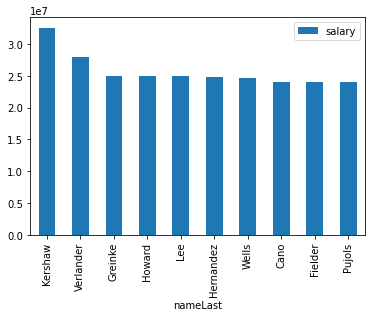

In [47]:
# Plotting a bar chart to visualise the top 10 best paid players

best_paid_top_10.plot(kind = "bar", x = "nameLast", y = "salary") # barh for horizontal

In [48]:
# Let's save the top 10 best paid player as csv and remove the index at the left hand side

best_paid.to_csv("highest_paid.csv", index = False)